In [1]:
import time
import dask.dataframe as dd
from dask.distributed import Client
from config import *
import simpler_pandas
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import simpler_mpl


%load_ext autoreload
%autoreload 2

In [3]:
if 'client' not in dir():
    client = Client(n_workers=10, threads_per_worker=1, processes=True, memory_limit='3GB')
    print(client)

DATA = DATA_PARQUET_10_SNAPPY 
ddf = dd.read_parquet(DATA)
ddf.dtypes

tin                 object
price                int64
date        datetime64[ns]
postcode            object
pt                  object
new                 object
duration            object
paon                object
saon                object
street              object
locality            object
town                object
district            object
county              object
ppd_cat             object
status              object
dtype: object

In [13]:
all_prices = ddf.price.compute()
all_prices.describe(percentiles=[0.01, 0.05, 0.5, 0.95, 0.99])

count    2.546751e+07
mean     1.991012e+05
std      7.602183e+05
min      1.000000e+00
1%       1.900000e+04
5%       3.595000e+04
50%      1.400000e+05
95%      4.900000e+05
99%      9.750000e+05
max      5.943000e+08
Name: price, dtype: float64

In [41]:
mask = all_prices < 1_000_000
prices = all_prices[mask]

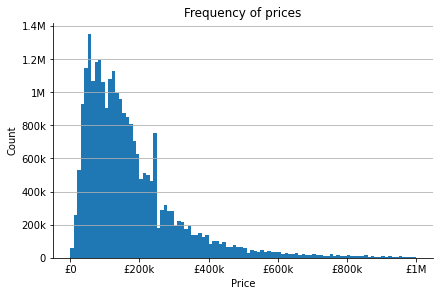

In [68]:
fig, ax = plt.subplots(constrained_layout=True)
prices.hist(ax=ax, bins=100)
simpler_mpl.set_common_mpl_styles(ax, ylabel='Count', xlabel='Price', 
                                  title="Frequency of prices", legend=False, grid_axis='x')
#simpler_mpl.set_commas(ax)
simpler_mpl.set_human_format(ax, on_y_axis=True, precision=1, trim_0_decimals=True)
simpler_mpl.set_human_format(ax, on_x_axis=True, precision=0, prefix="£", )

In [64]:
price_bins = np.arange(0, 1_000_000, 10_000)
binned_prices = simpler_pandas.bin_and_label(prices, price_bins)

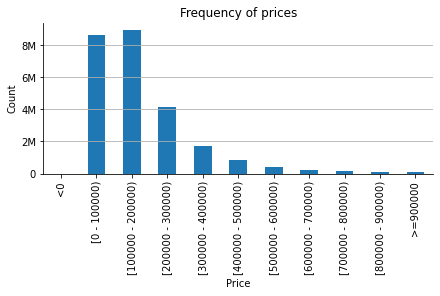

In [73]:
fig, ax = plt.subplots(constrained_layout=True)
binned_prices.plot(kind='bar', ax=ax)

simpler_mpl.set_common_mpl_styles(ax, ylabel='Count', xlabel='Price', 
                                  title="Frequency of prices", legend=False, grid_axis='y')
#simpler_mpl.set_commas(ax)
simpler_mpl.set_human_format(ax, on_y_axis=True, precision=1, trim_0_decimals=True)
#simpler_mpl.set_human_format(ax, on_x_axis=True, precision=0, prefix="£", )

In [ ]:
df_to_plot = df_seconds.reset_index().assign(nrows=[f'{v:,}' for v in df_seconds.index])

fig, ax = plt.subplots(constrained_layout=True)
binned_prices.plot(kind='bar', ax=ax)

simpler_mpl.set_common_mpl_styles(ax, ylabel='Count', xlabel='Price', 
                                  title="Frequency of prices", legend=False, grid_axis='y')
#simpler_mpl.set_commas(ax)
simpler_mpl.set_human_format(ax, on_y_axis=True, precision=1, trim_0_decimals=True)
#simpler_mpl.set_human_format(ax, on_x_axis=True, precision=0, prefix="£", )

# look at bigger df

In [ ]:
df = ddf[['date', 'price', 'pt']].compute()

In [ ]:
dfs = df.sample(1000)

In [81]:
gpby = dfs.groupby([dfs.date.dt.year, 'pt']).agg({'price': ['mean', 'median']})
gpby

price          
                  mean    median
date pt                         
1995 D    91496.666667   77750.0
     F    37750.000000   37750.0
     S    56041.250000   52500.0
     T    44183.333333   44250.0
1996 D   104213.857143   93500.0
...                ...       ...
2019 T   204610.555556  195995.0
2020 D   610000.000000  315000.0
     F   302249.166667  357500.0
     O   320000.000000  320000.0
     S   240500.000000  187000.0

[107 rows x 2 columns]

In [112]:
simpler_pandas.flatten_multiindex(gpby)

,price_mean,price_median
1995_D,91496.666667,77750.0
1995_F,37750.000000,37750.0
1995_S,56041.250000,52500.0
1995_T,44183.333333,44250.0
1996_D,104213.857143,93500.0
...,...,...
2019_T,204610.555556,195995.0
2020_D,610000.000000,315000.0
2020_F,302249.166667,357500.0
2020_O,320000.000000,320000.0
